In [1]:
# Imports
from env import host, user, password
import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle as w
np.random.seed(42)

# Initial data pull and looking at / seeking to understand data

In [2]:
# initial sql query 
df = w.get_zillow_data()

csv file found and read


In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
#rename columns to something less unwieldy
df.columns = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'year_built', 'tax_amount', 'county']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     float64
 1   bathrooms    float64
 2   square_feet  float64
 3   tax_value    float64
 4   year_built   float64
 5   tax_amount   float64
 6   county       float64
dtypes: float64(7)
memory usage: 115.0 MB


In [6]:
df.isnull().sum()

bedrooms         11
bathrooms        11
square_feet    8484
tax_value       493
year_built     9337
tax_amount     4442
county            0
dtype: int64

In [7]:
df.bedrooms.value_counts(dropna=False)

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
NaN         11
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedrooms, dtype: int64

In [8]:
df.bathrooms.value_counts(dropna=False)

2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
NaN          11
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathrooms, dtype: int64

In [9]:
df.square_feet.value_counts()

1200.0     5195
1080.0     4389
1120.0     4362
1400.0     3833
1440.0     3690
           ... 
10613.0       1
9360.0        1
10238.0       1
13748.0       1
24920.0       1
Name: square_feet, Length: 10580, dtype: int64

In [10]:
df.tax_value.sort_values()

221686     1.0
1561311    1.0
1529169    1.0
1518436    2.0
667672     4.0
          ... 
2131494    NaN
2142029    NaN
2142113    NaN
2142169    NaN
2142173    NaN
Name: tax_value, Length: 2152863, dtype: float64

In [11]:
(df.tax_value % 1).sum()

0.0

In [12]:
# decided to drop all nulls since it was only ~1% of data
# -- actually only .6% of data because some rows had multiple nulls
df = df.dropna()

In [13]:
df.shape

(2140235, 7)

In [14]:
# most columns can/should be integers; exception was bathroom_cnt which I left as a float
for col in df.columns [df.columns != 'bathrooms']:
#     print (col)
    df[col] = df[col].astype(int)

In [15]:
# decided fips should really be a string to better represent a categorical variable
df.county = df.county.map({6037: 'LA', 6059: 'Orange', 6111: 'Ventura'})

In [16]:
df.head()

,bedrooms,bathrooms,square_feet,tax_value,year_built,tax_amount,county
4,4,2.0,3633,296425,2005,6941,LA
6,3,4.0,1620,847770,2011,10244,LA
7,3,2.0,2077,646760,1926,7924,LA
11,0,0.0,1200,5328,1972,91,LA
14,0,0.0,171,6920,1973,255,LA


# Acquire Summary
- combined acquire and clean_up code into wrangle_zillow (not yet split)

In [17]:
df = w.wrangle_zillow()

csv file found and read


# Visualization of univariate variables

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2033172 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bedrooms     int64 
 1   bathrooms    int64 
 2   square_feet  int64 
 3   tax_value    int64 
 4   year_built   int64 
 5   tax_amount   int64 
 6   county       object
dtypes: int64(6), object(1)
memory usage: 124.1+ MB


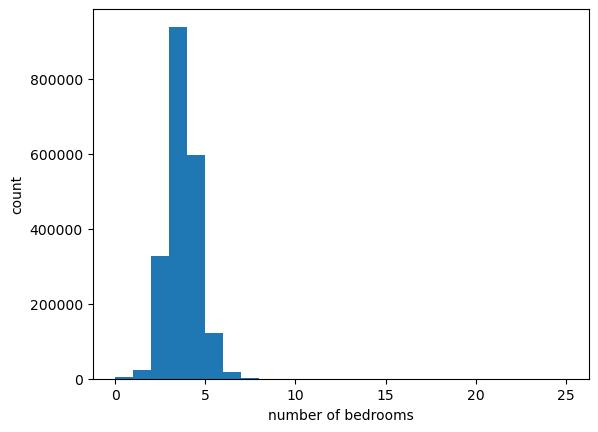

In [19]:
bins_ = range(0,26)
plt.hist(df.bedrooms, bins=bins_)
plt.ylabel('count')
plt.xlabel('number of bedrooms')
plt.show()

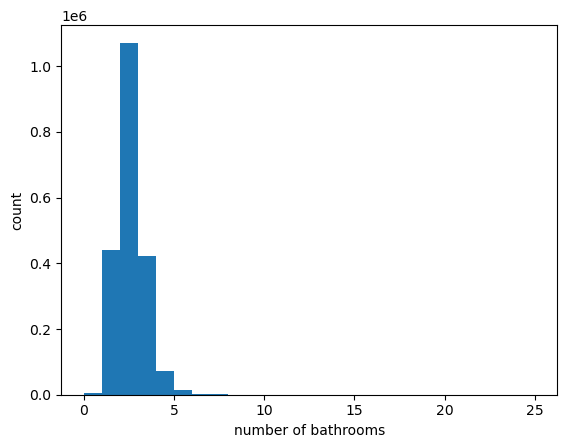

In [20]:
plt.hist(df.bathrooms, bins=bins_)
plt.ylabel('count')
plt.xlabel('number of bathrooms')
plt.show()

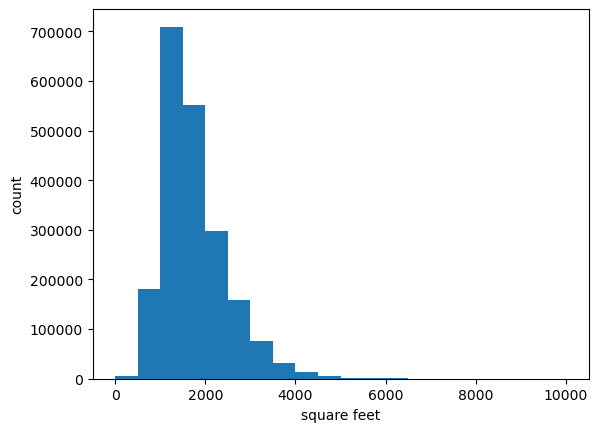

In [21]:
sf_bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
plt.hist(df.square_feet, bins=sf_bins)
plt.ylabel('count')
plt.xlabel('square feet')
plt.show()

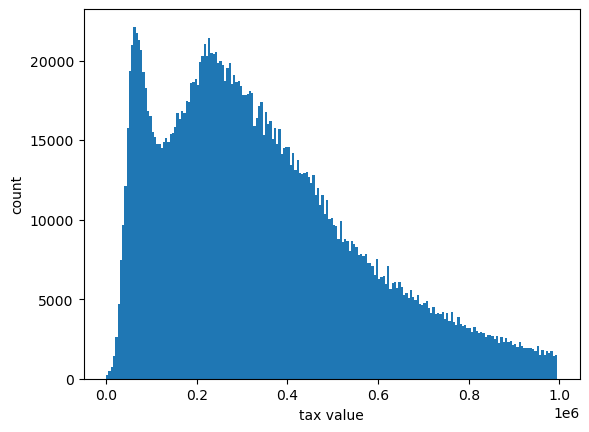

In [22]:
tax_value_cnt_bins = range(0,1_000_000,5000)
plt.hist(df.tax_value, bins=tax_value_cnt_bins)
plt.ylabel('count')
plt.xlabel('tax value')
plt.show()

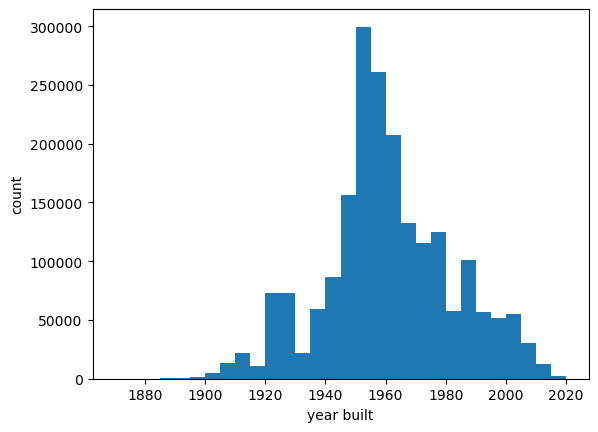

In [23]:
year_bins = range(1870,2025,5)
plt.hist(df.year_built, bins=year_bins)
plt.ylabel('count')
plt.xlabel('year built')
plt.show()

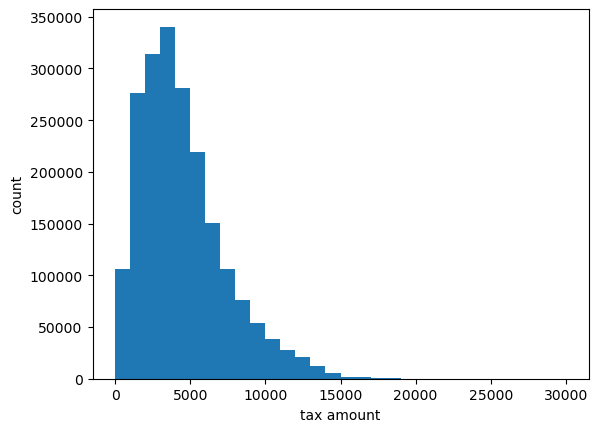

In [24]:
tax_amt_range = range(0,31000,1000)
plt.hist(df.tax_amount, bins=tax_amt_range)
plt.ylabel('count')
plt.xlabel('tax amount')
plt.show()

In [25]:
df.county.value_counts()

LA         1355240
Orange      519749
Ventura     158183
Name: county, dtype: int64

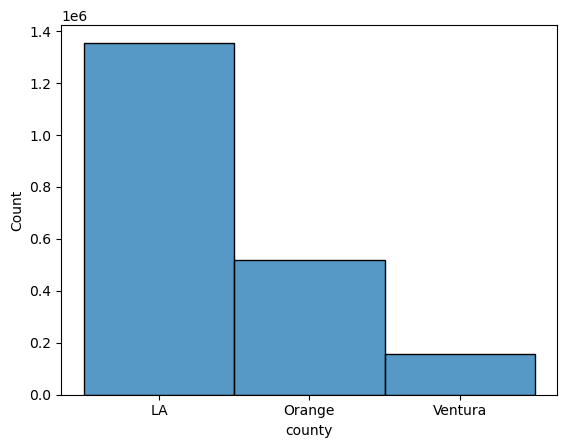

In [26]:
# fips is more of a categorical variable; casting it as a string made it work better with histplot
# fips has only 3 unique values: 6037 ('LA'), 6059 ('Orange') , 6111 ('Ventura')
sns.histplot(data=df.county)
# plt.ylabel('count')
# plt.xlabel('fips')
plt.show()

In [27]:
# I wasn't supposed to do this until after splitting!
# mean values for each column broken down by fips code
# for fip in df.fips.unique():
#     for col in df.drop(columns=['bedrooms','bathrooms','year_built','fips']).columns:
#         print(f'{fip}   mean {col}: {df[df.fips == fip][col].mean()}')
#         print(f'{fip} median {col}: {df[df.fips == fip][col].median()}')
#     print()

bedrooms


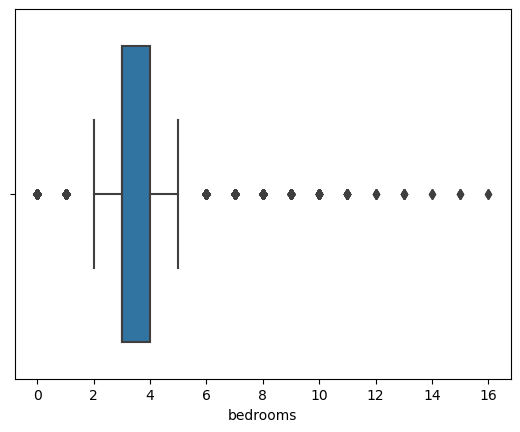

bathrooms


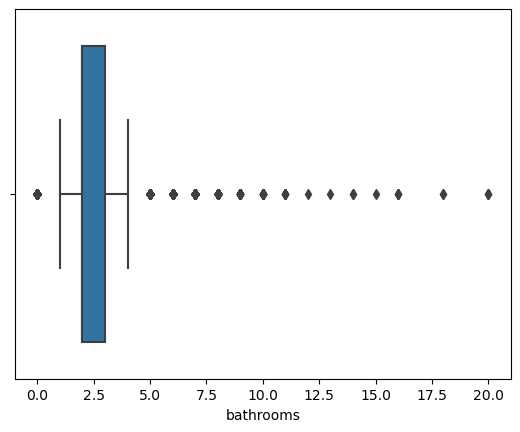

square_feet


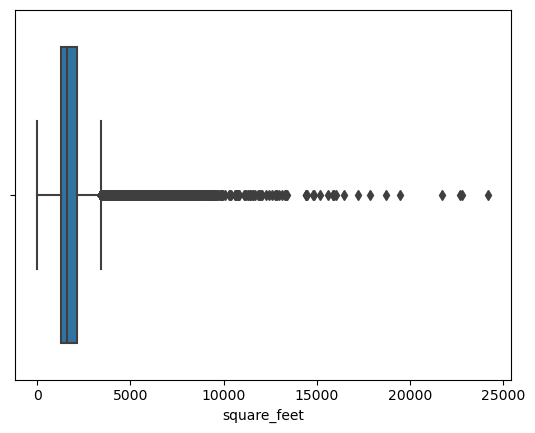

tax_value


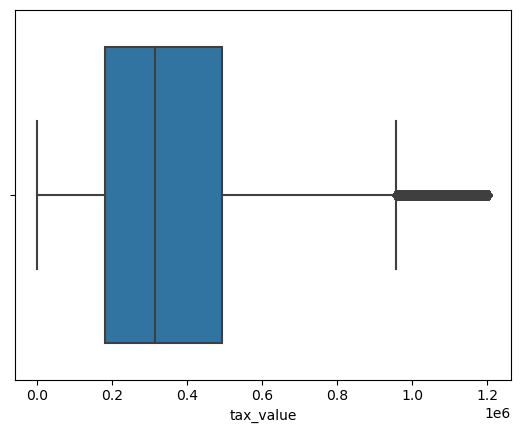

year_built


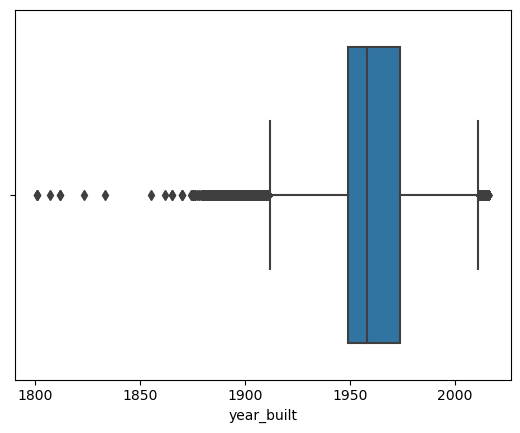

tax_amount


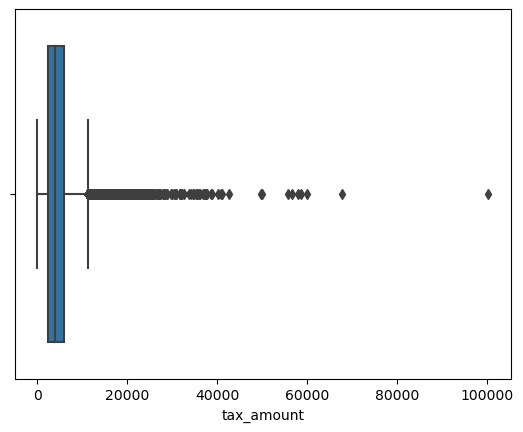

In [28]:
# boxplots for all numerica columns (everything but fips)
for col in (df.drop(columns='county').columns):
    print (col)
    sns.boxplot(data=df, x=col)
    plt.show()
    

In [29]:
# After visualization, I've decided to drop some outliers
# - square_feet> 25_000 AND the top 5% of tax_values
# df = df [df.square_feet < 25_000]

In [30]:
# df = df [df.tax_value < df.tax_value.quantile(.95)]

# Summary of initial look at data
- 2152863 rows prior to cleaning
- 2033172 rows after cleaning
- nulls represented < 1% of data, so I removed them
- 7 columns: 6 numeric, 1 categorical
- changed all numeric columns to int except bathrooms which stayed float
- one numeric column, fips, is actually categorical, and it has 3 unique values: 6037, 6059, 6111
    - fips represents a region code akin to zip code (fips stands for federal information processing system)
    - 6037 == '06037' which is Los Angeles County in CA
    - 6059 == '06059' which is Orange County, CA
    - 6111 == '06111' which is Ventura County, CA

- each row is a "Single Family Residential" property from a 2017 Zillow database
- each column is an attribute of that house. All columns are numeric
- most numeric columns have normally distributed values with right skew (right tails, mean greater than median)
    - which indicates a smaller number of higher values (square feet, tax_value, etc.)
    - which also indicates that a small number of these properties are big/high-value "mansion" type houses
- fips distribution:
    - 1.4 M homes in 6037 (LA County)
    -  .6 M homes in 6059 (Orange County) 
    -  .15M homes in 6111 (Ventura County)

- Outliers
- I chose to discard rows with square_feet >= 25,000
    - there were two homes with ludicrous high square_footages
- I also chose to discard rows that were in the top 5% of tax_value
    - there were some very expensive homes compared to most homes)

In [31]:
df = w.wrangle_zillow()

csv file found and read


In [32]:
df.shape

(2033172, 7)

In [33]:
train, validate, test = w.split_function(df)

Prepared df: (2033172, 7)

Train: (1219902, 7)
Validate: (406635, 7)
Test: (406635, 7)
